# **1.Impoting important packages**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score 
data = sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0
#represents not 
data['affair'] = (data.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
 religious + educ + C(occupation) + C(occupation_husb)', data, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

# **2.Data Overview**

In [7]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [8]:
data['affair'].unique()

array([1, 0])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


# **3.Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


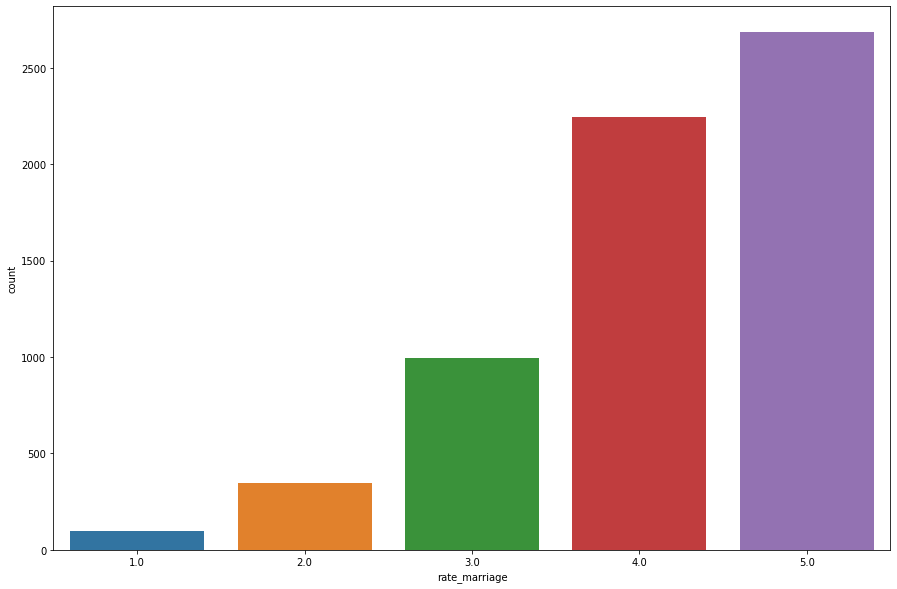

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


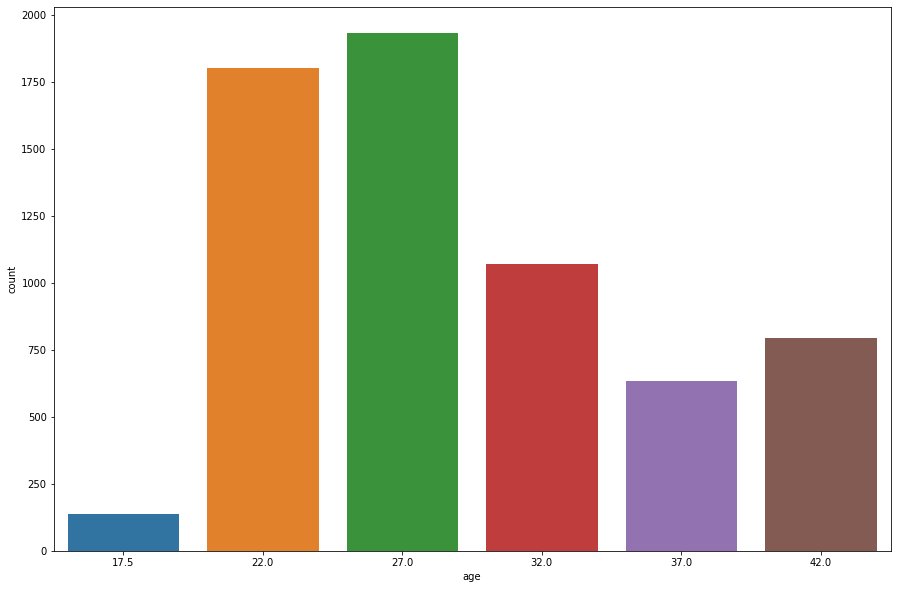

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


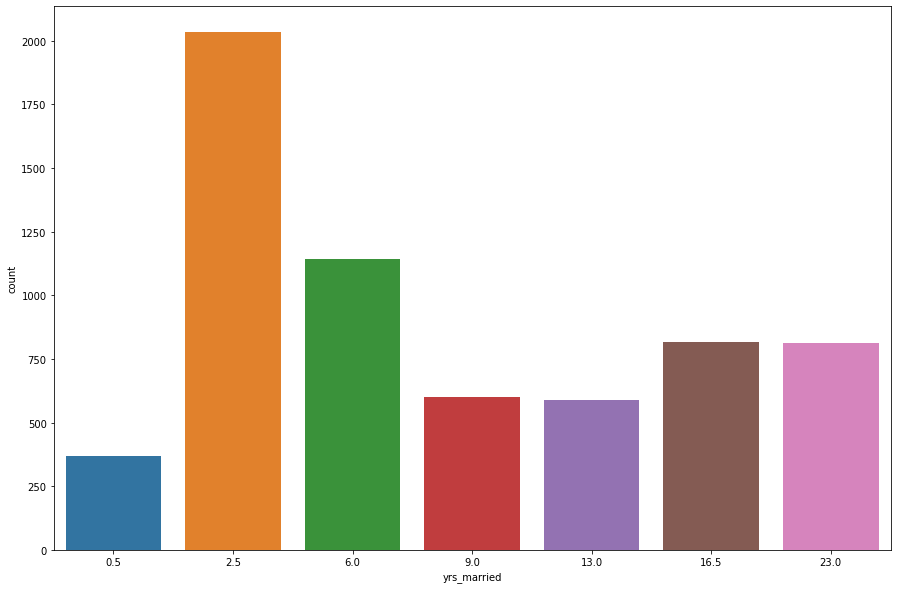

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


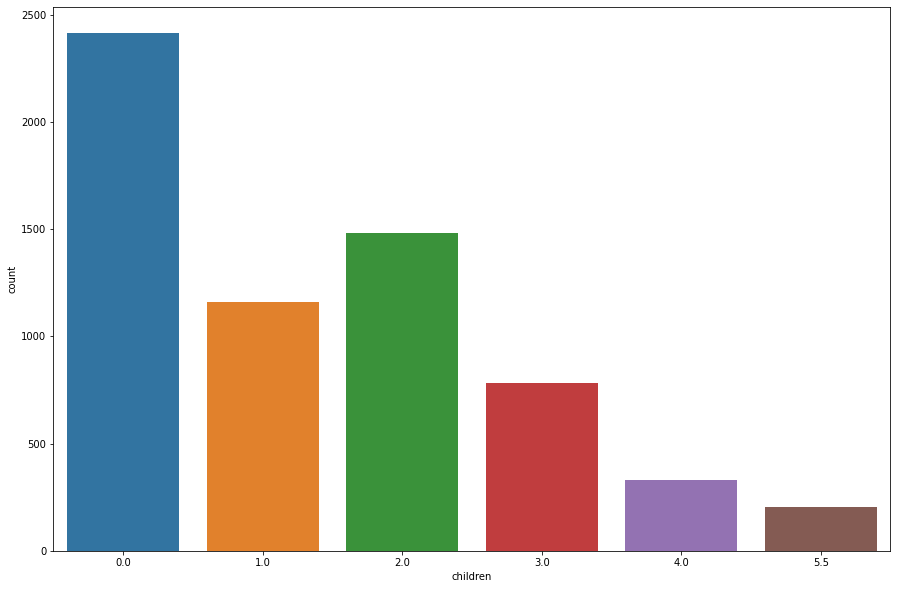

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


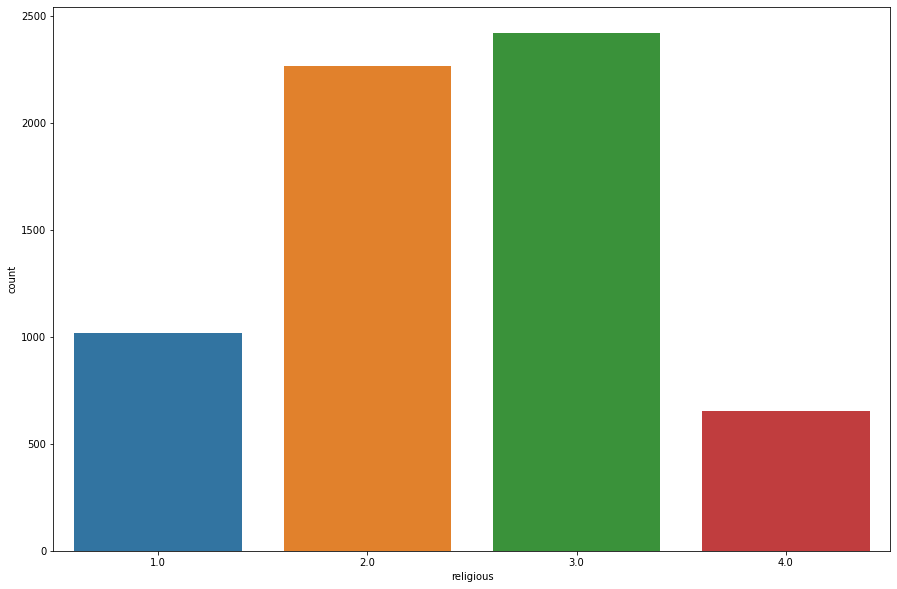

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


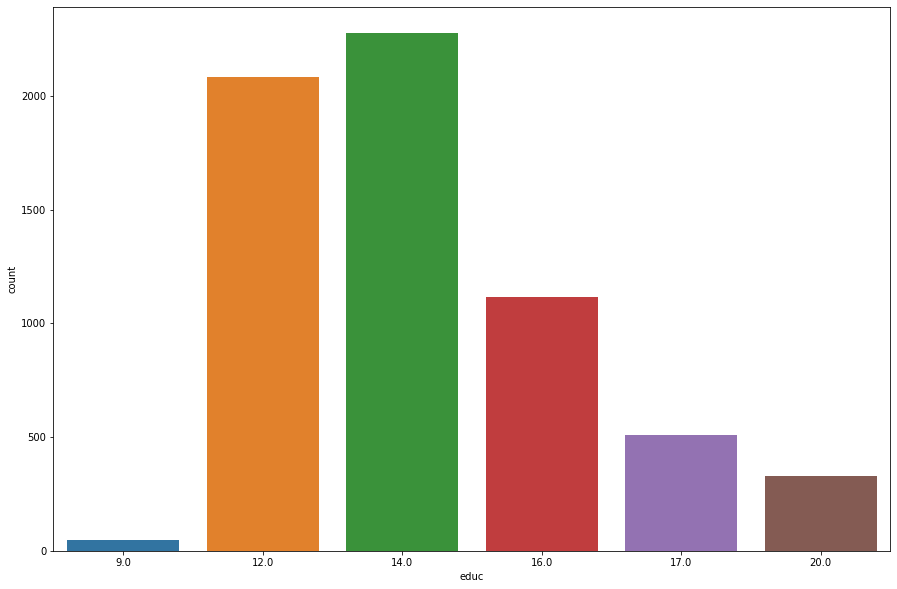

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


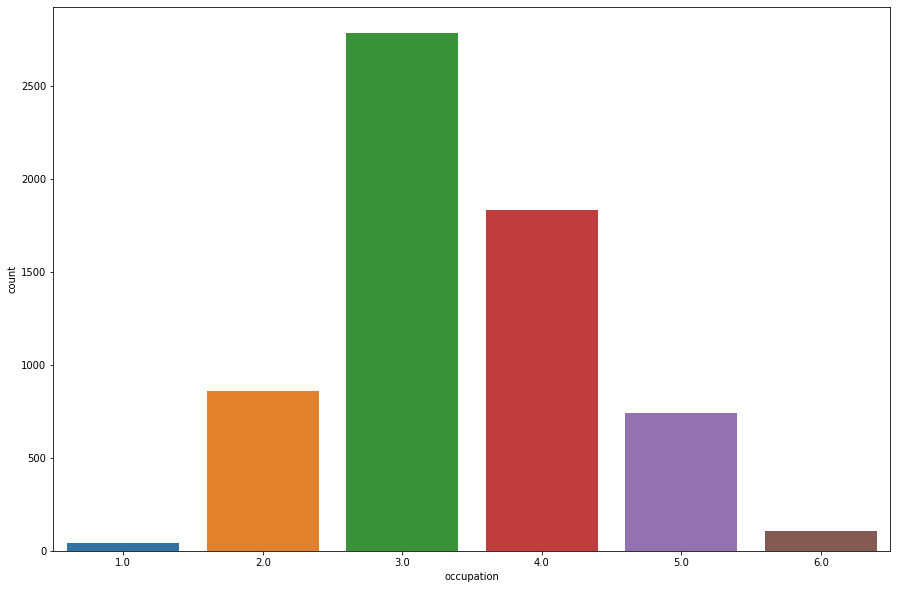

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


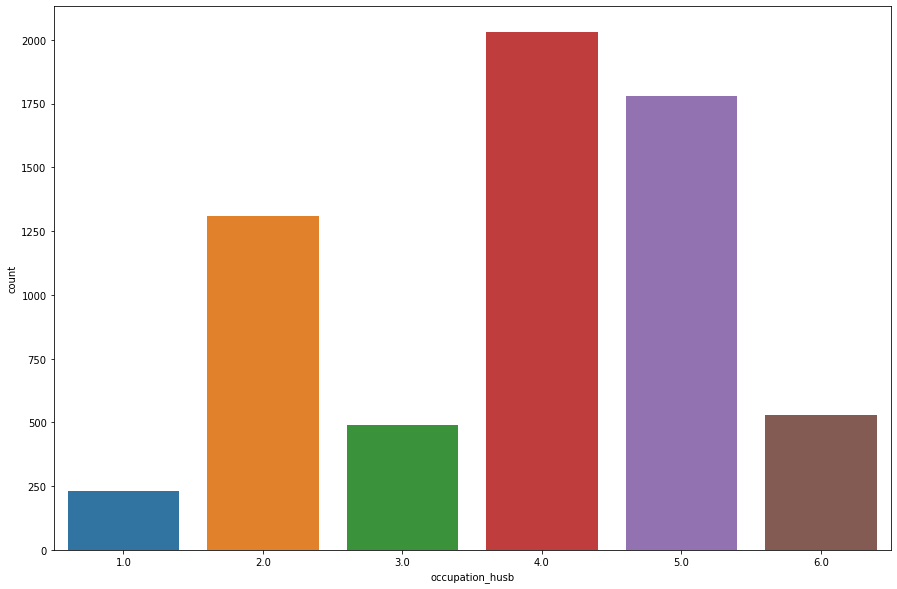

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


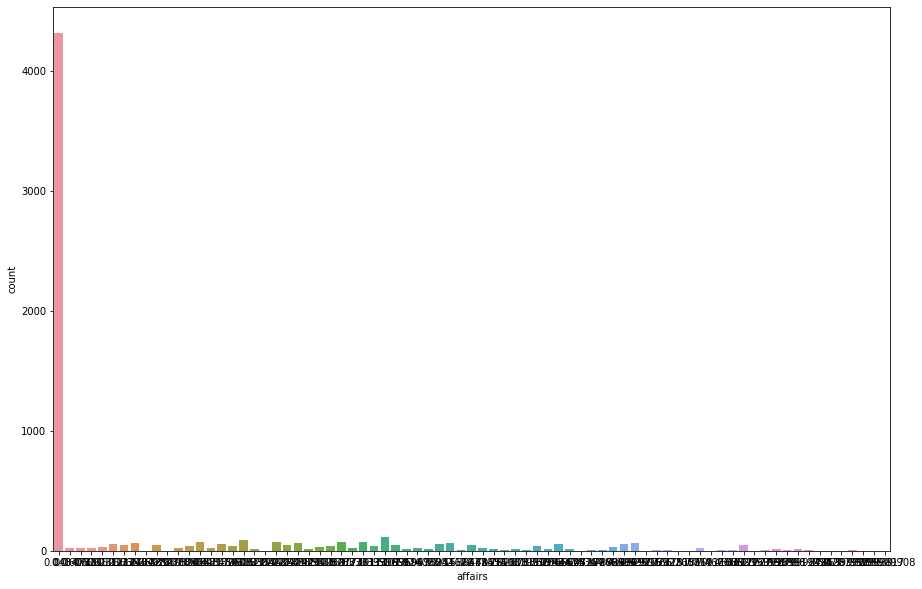

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


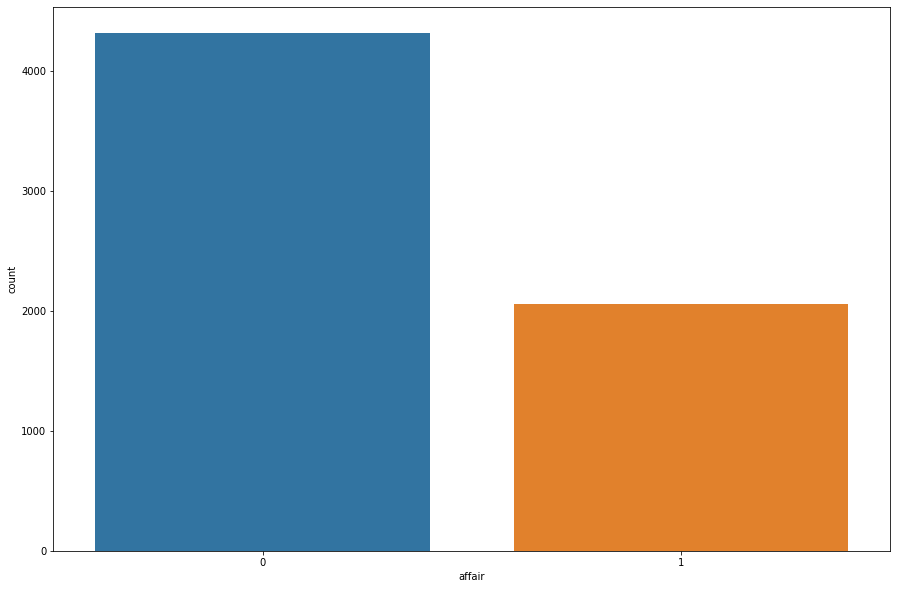

In [12]:
import seaborn as sns
for col in data.columns:
  plt.figure(figsize=(15,10))
  sns.countplot(data[col])
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


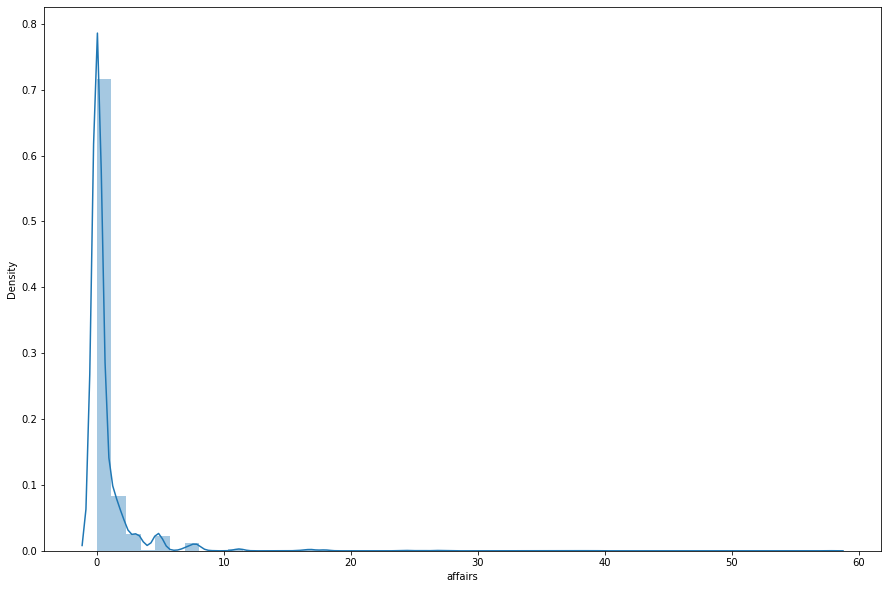

In [13]:
plt.figure(figsize=(15,10))
sns.distplot(data['affairs'])
plt.show()

# *Since, the 'affairs' column is highly skewed hence we have to do data transformation using log-transform.*

In [14]:
from scipy import stats
data['affairs'].skew()

8.764859367462167

In [16]:
c=0
for val in data['affairs']:
  if val==0:
    c+=1
print(c)    

4313


In [19]:
data['affairs'].replace(0,0.00000001,inplace=True)

In [22]:
data['affairs'] = np.log(data['affairs'])

In [23]:
data['affairs'].skew()

0.7802556327278494

# *Now, you can see the skewness has dropped to 0.78 from 8.76.*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


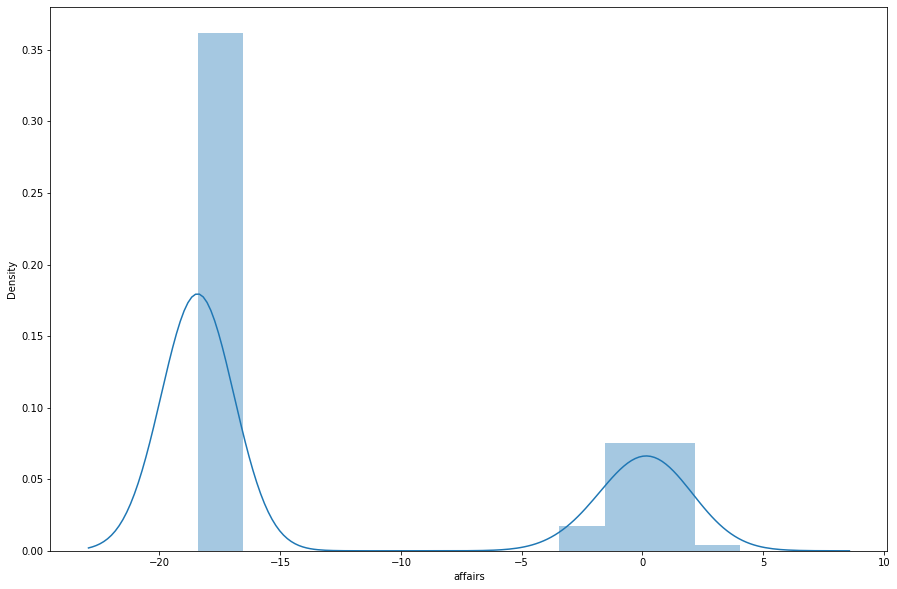

In [24]:
plt.figure(figsize=(15,10))
sns.distplot(data['affairs'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


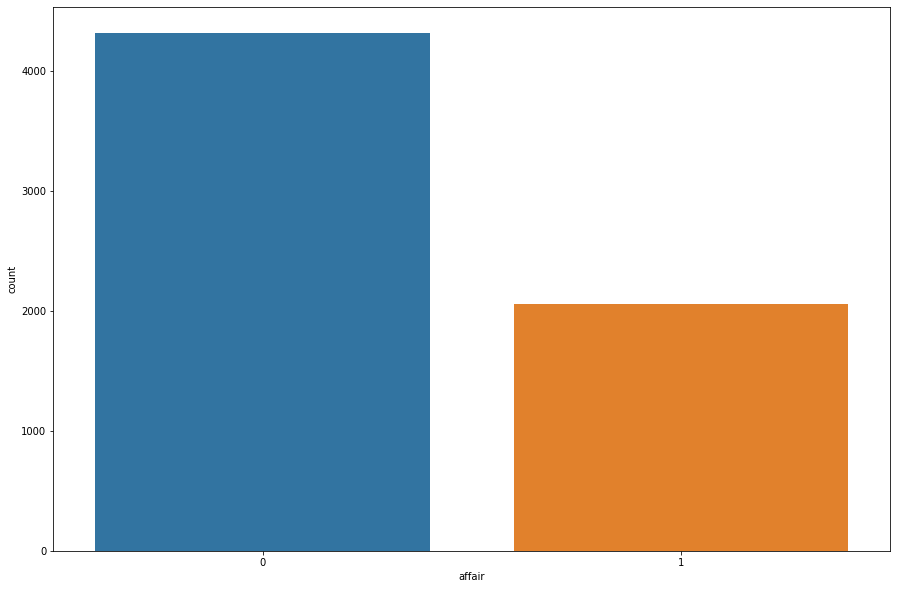

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data['affair'])
plt.show()

# We don't have much imbalanced data. Things will work fine with this.

# **4.Checking for collinearity if any.**

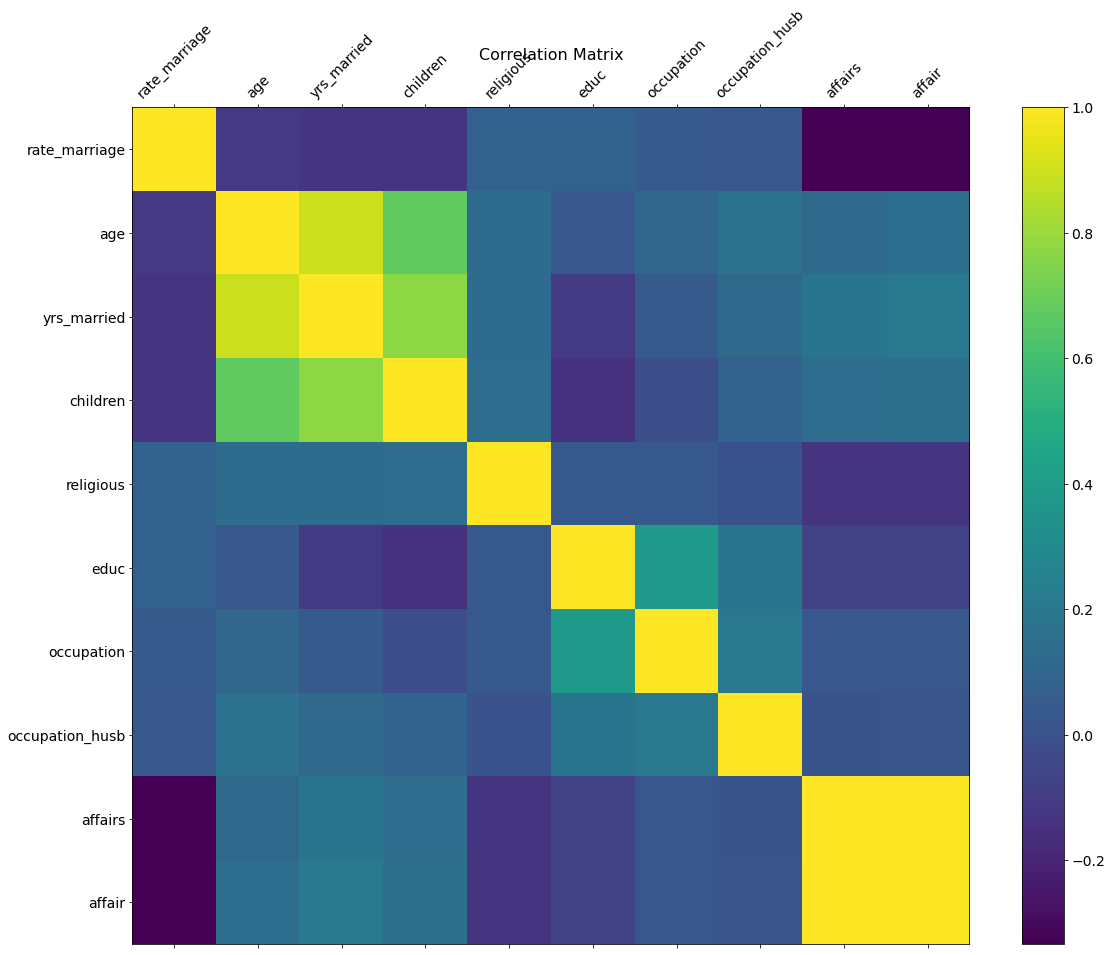

In [27]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# *As we can see 'affairs' and 'affair' are completely related with each other. So dropping one of them is must.*<br><I>Similarly 'yrs_married', 'children' and 'age' are highly related with each other so keeping one of them would be a good idea.

In [30]:
data_with_child = data.drop(['yrs_married','affair','age'],axis=1)

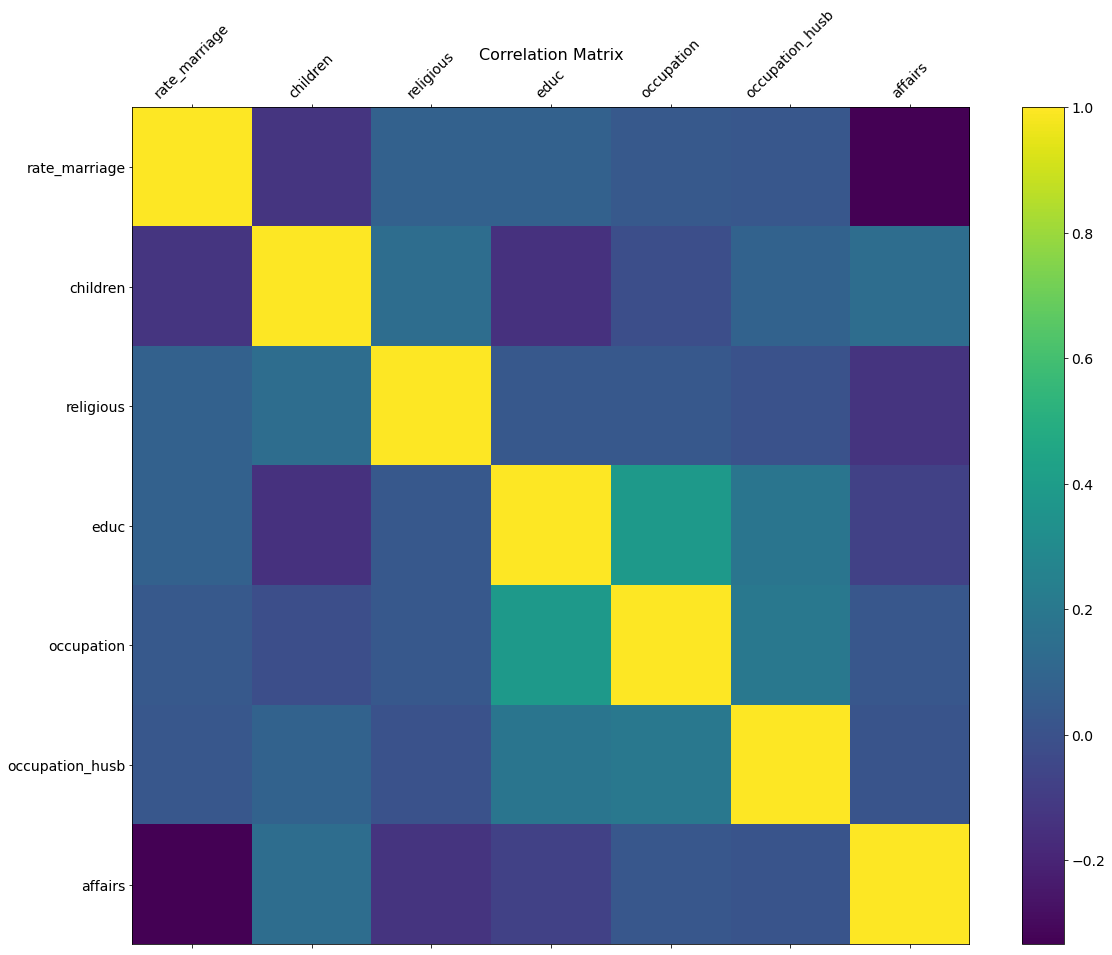

In [31]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data_with_child.corr(), fignum=f.number)
plt.xticks(range(data_with_child.shape[1]), data_with_child.columns, fontsize=14, rotation=45)
plt.yticks(range(data_with_child.shape[1]), data_with_child.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# **5.Data Preparation**

In [34]:
X_tr,X_test,Y_tr,Y_test = train_test_split(data_with_child,y,test_size=0.25,random_state=42)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_tr,Y_tr,test_size=0.25,random_state=42)

# **6. Hyperparameter tunning**

In [42]:
params= [0.00001,0.0001,0.001,0.01,1,10,100,1000,10000,100000]
from sklearn.metrics import roc_auc_score
auc_cv = []
auc_tr = []
for i in params:
  model = LogisticRegression(penalty='l2', C=i)
  model.fit(X_train,Y_train)
  pred_cv = [j.max() for j in model.predict_proba(X_cv)]
  pred_tr = [j.max() for j in model.predict_proba(X_train)]
  auc_cv.append(roc_auc_score(Y_cv,pred_cv))
  auc_tr.append(roc_auc_score(Y_train,pred_tr))

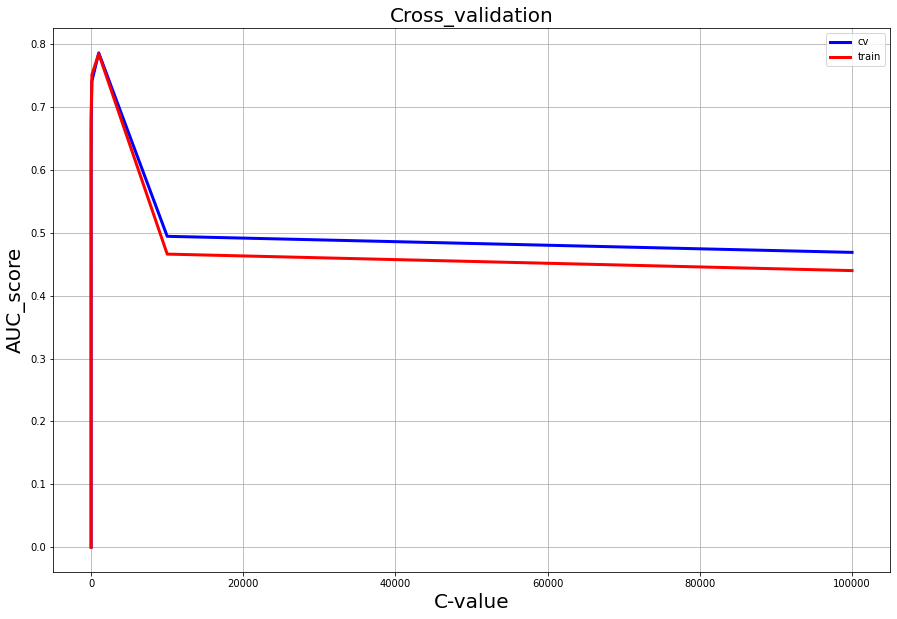

In [47]:
plt.figure(figsize=(15,10))
plt.plot(params,auc_cv,linewidth=3,color='blue')
plt.plot(params,auc_tr,linewidth=3,color='red')
plt.title('Cross_validation',fontsize=20)
plt.ylabel('AUC_score',fontsize=20)
plt.xlabel('C-value',fontsize=20)
plt.grid(b=True)
plt.legend(['cv','train'])
plt.show()

# *Conclusion: As we can see that the best value for our regularizer constant  is C=1000 with L2 regularization.*

# **7. predictions**

In [49]:
from sklearn.metrics import accuracy_score
best_model = LogisticRegression(penalty='l2',C=1000)
best_model.fit(X_train,Y_train)
pred_tr = best_model.predict(X_train)
pred_test = best_model.predict(X_test)
print('Accuracy on train data is {0} and accuracy on test data is {1}'.format(accuracy_score(Y_train,pred_tr),accuracy_score(Y_test,pred_test)))

Accuracy on train data is 1.0 and accuracy on test data is 1.0
